In [40]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import optimizers
import gc

In [54]:
# Get data
fashion_mnist = tf.keras.datasets.fashion_mnist
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

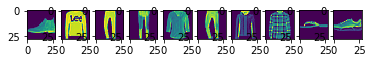

In [42]:
f = plt.figure()
for i in range(10):
    f.add_subplot(1,10,i+1)
    plt.imshow(testX[i])


In [55]:
trainX = trainX / 255.0
testX  = testX / 255.0

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 192us/sample - loss: 0.4981 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 12s 198us/sample - loss: 0.3723 - acc: 0.8653
Epoch 3/5
60000/60000 [==============================] - 12s 201us/sample - loss: 0.3367 - acc: 0.8776
Epoch 4/5
60000/60000 [==============================] - 11s 182us/sample - loss: 0.3116 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2931 - acc: 0.8918
10000/1 - 1s - loss: 0.2808 - acc: 0.8702
accuracy = 0.870199978352


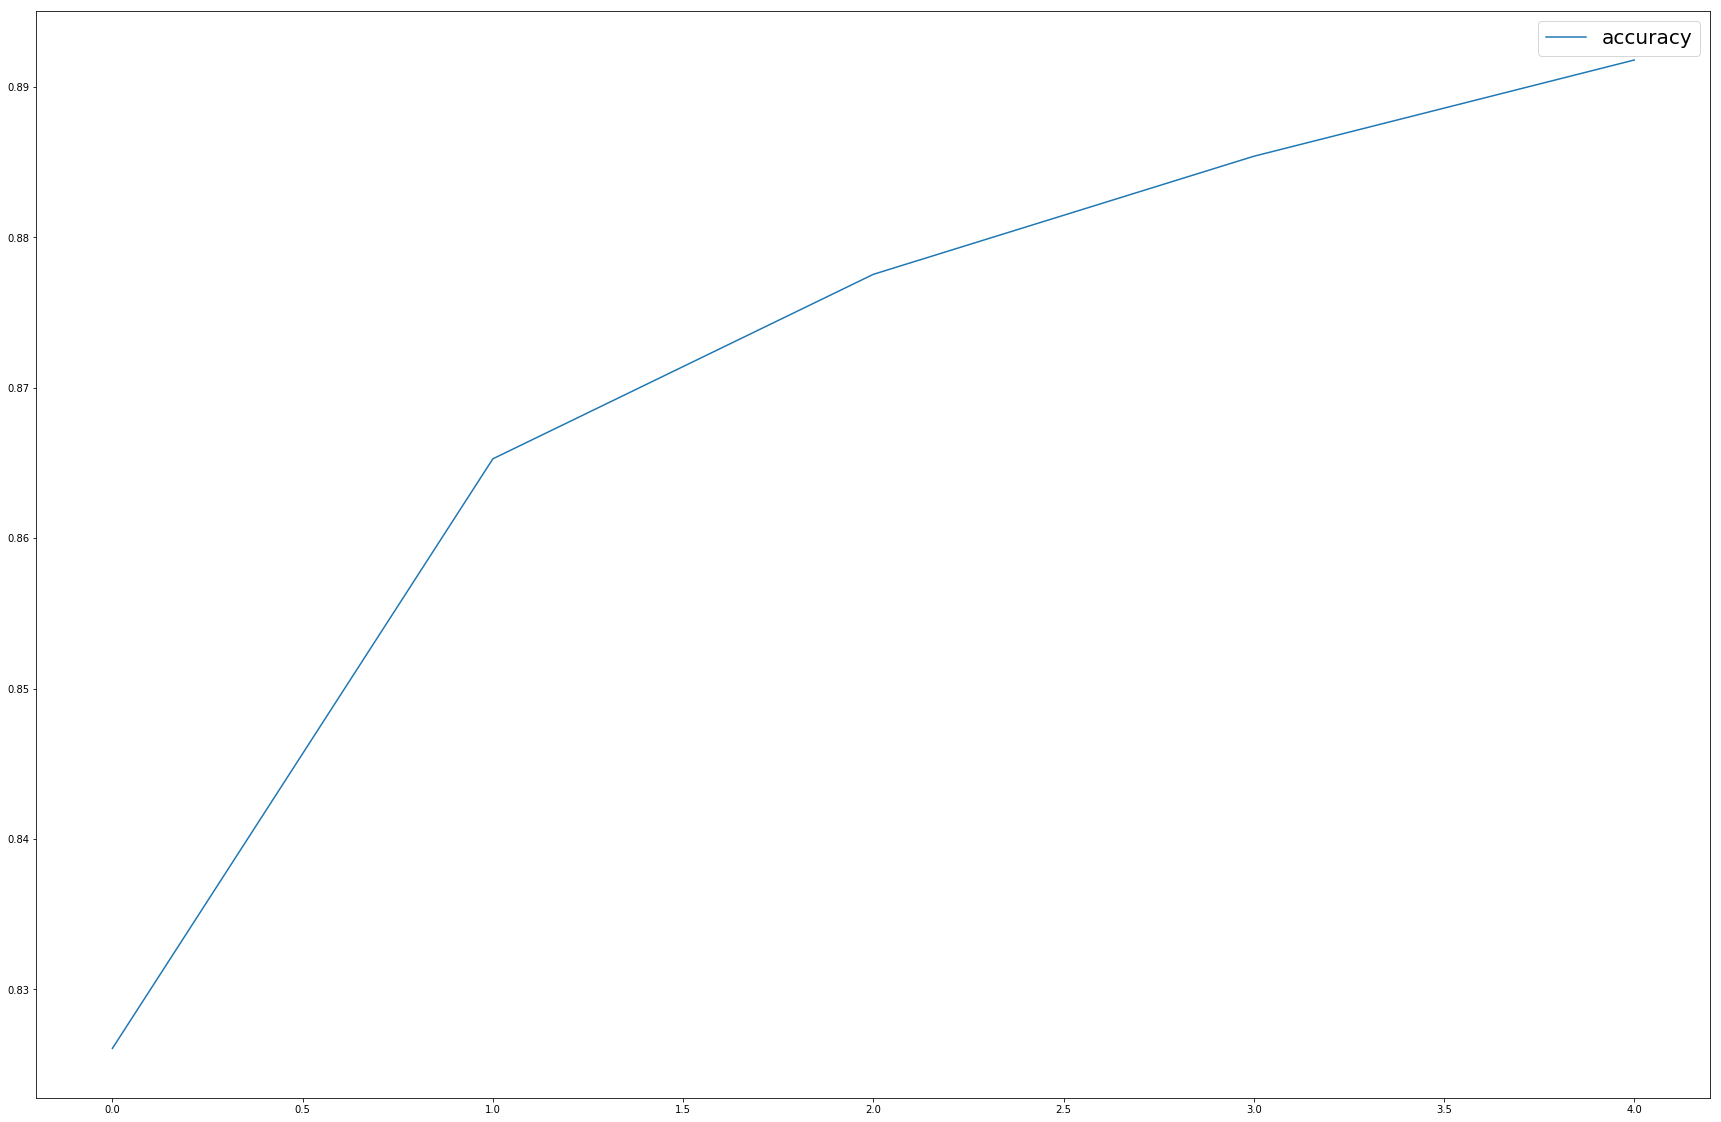

In [57]:
fig = plt.figure(figsize = (30,20))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    #tf.keras.layers.Dense(500, activation = 'sigmoid',kernel_regularizer = tf.keras.regularizers.l1(0.001)),
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])
acc = model.fit(trainX,trainY,epochs = 5, verbose = 1)
    
test_loss, test_acc = model.evaluate(testX,testY,verbose = 2)
plt.plot(acc.history['acc'],label = 'accuracy')
print("accuracy = {}".format(test_acc))
# release momory
gc.collect()
plt.legend(fontsize = 20)
#fig.savefig('Fashion nn.png')

In [46]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_46 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_47 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [59]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.3879 - acc: 0.8614
Epoch 2/5
60000/60000 [==============================] - 156s 3ms/sample - loss: 0.2651 - acc: 0.9029
Epoch 3/5
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.2217 - acc: 0.9181
Epoch 4/5
60000/60000 [==============================] - 156s 3ms/sample - loss: 0.1896 - acc: 0.9294
Epoch 5/5
60000/60000 [==============================] - 156s 3ms/sample - loss: 0.1620 - acc: 0.9397
10000/1 - 4s - loss: 0.2098 - acc: 0.9090
accuracy = 0.908999979496


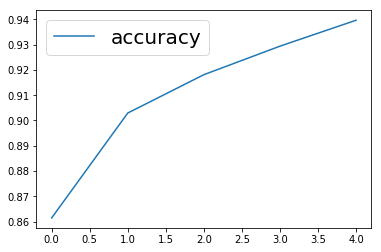

In [61]:
model_cnn = tf.keras.models.Sequential([       
    tf.keras.layers.Conv2D(64, input_shape = (28,28,1), kernel_size = 2, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = [2,2]),    
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),    
    tf.keras.layers.Dense(10, activation = 'softmax')
])
model_cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])
acc = model_cnn.fit(trainX,trainY,epochs = 5,verbose = 1)
    
test_loss, test_acc = model_cnn.evaluate(testX,testY,verbose = 2)
plt.plot(acc.history['acc'],label = 'accuracy')
print("accuracy = {}".format(test_acc))
# release momory
gc.collect()
plt.legend()
fig.savefig('Fashion cnn.png')